# 任务1

In [ ]:
import numpy as np
import pandas as pd

In [5]:
#数据获取
df = pd.read_csv('./employee_retention_data.csv')
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [26]:
#检查数据
df.dtypes
# 后面需要生成时间列表，类型为datetime，因此事先统一格式
df['join_date'] = df['join_date'].astype('datetime64')
df['quit_date'] = df['quit_date'].astype('datetime64')

In [8]:
#一共有12家公司，且数据区间为2011/01/24 到 2015/12/13之间
# 先生成公司id列表
company_id_list = list(range(1,13))
# 再生成日期列表
date_list = pd.date_range(start='24/01/2011', end='13/12/2015')
company_id_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [9]:
date_list

DatetimeIndex(['2011-01-24', '2011-01-25', '2011-01-26', '2011-01-27',
               '2011-01-28', '2011-01-29', '2011-01-30', '2011-01-31',
               '2011-02-01', '2011-02-02',
               ...
               '2015-12-04', '2015-12-05', '2015-12-06', '2015-12-07',
               '2015-12-08', '2015-12-09', '2015-12-10', '2015-12-11',
               '2015-12-12', '2015-12-13'],
              dtype='datetime64[ns]', length=1785, freq='D')

In [13]:
#生成一个新的表格
new_df = pd.DataFrame([(x, y) for x in company_id_list for y in date_list]) #使用列表推导式组合company_id_list以及date_list
new_df.columns = ['company_id','date']
new_df

,company_id,date
0,1,2011-01-24
1,1,2011-01-25
2,1,2011-01-26
3,1,2011-01-27
4,1,2011-01-28
...,...,...
21415,12,2015-12-09
21416,12,2015-12-10
21417,12,2015-12-11
21418,12,2015-12-12


In [15]:
#计算每天入职人数
join_count = pd.DataFrame(df.groupby(['company_id','join_date']).size()).reset_index()
join_count.columns = ['company_id','date','join_num']
join_count.dtypes

company_id     int64
date          object
join_num       int64
dtype: object

In [16]:
# 将date列转换为日期格式
join_count['date'] = join_count['date'].astype('datetime64')
join_count

,company_id,date,join_num
0,1,2011-01-24,25
1,1,2011-01-25,2
2,1,2011-01-26,2
3,1,2011-01-31,30
4,1,2011-02-01,7
...,...,...,...
5125,12,2014-05-19,2
5126,12,2014-10-13,1
5127,12,2015-03-23,1
5128,12,2015-07-06,1


In [18]:
#计算每天离职人数
quit_count = pd.DataFrame(df.groupby(['company_id','quit_date']).size()).reset_index()
quit_count.columns = ['company_id','date','quit_num']
quit_count['date'] = quit_count['date'].astype('datetime64')
quit_count

,company_id,date,quit_num
0,1,2011-10-21,1
1,1,2011-11-11,1
2,1,2011-11-22,1
3,1,2011-11-25,1
4,1,2011-12-09,1
...,...,...,...
2719,12,2013-10-18,1
2720,12,2013-10-25,1
2721,12,2014-02-07,1
2722,12,2014-09-19,1


In [19]:
# 合并new_df以及新生成的join_count以及quit_count表单，得出每天在公司的人数
new_df = pd.merge(new_df, join_count,on=['company_id','date'],how='left')
new_df

,company_id,date,join_num
0,1,2011-01-24,25.0
1,1,2011-01-25,2.0
2,1,2011-01-26,2.0
3,1,2011-01-27,NaN
4,1,2011-01-28,NaN
...,...,...,...
21415,12,2015-12-09,NaN
21416,12,2015-12-10,NaN
21417,12,2015-12-11,NaN
21418,12,2015-12-12,NaN


In [20]:
new_df = pd.merge(new_df, quit_count,on=['company_id','date'],how='left')
new_df

,company_id,date,join_num,quit_num
0,1,2011-01-24,25.0,NaN
1,1,2011-01-25,2.0,NaN
2,1,2011-01-26,2.0,NaN
3,1,2011-01-27,NaN,NaN
4,1,2011-01-28,NaN,NaN
...,...,...,...,...
21415,12,2015-12-09,NaN,NaN
21416,12,2015-12-10,NaN,NaN
21417,12,2015-12-11,NaN,NaN
21418,12,2015-12-12,NaN,NaN


In [23]:
# 将null值取0
new_df = new_df.fillna(0)
new_df.columns = ['company_id','date','join_count','quit_count']
new_df

,company_id,date,join_count,quit_count
0,1,2011-01-24,25.0,0.0
1,1,2011-01-25,2.0,0.0
2,1,2011-01-26,2.0,0.0
3,1,2011-01-27,0.0,0.0
4,1,2011-01-28,0.0,0.0
...,...,...,...,...
21415,12,2015-12-09,0.0,0.0
21416,12,2015-12-10,0.0,0.0
21417,12,2015-12-11,0.0,0.0
21418,12,2015-12-12,0.0,0.0


In [24]:
# 新增课题要求的特征列
new_df['join_cumsum'] = new_df.groupby('company_id')['join_count'].cumsum() # 以公司id为聚类，累计计算join_count列
new_df['quit_cumsum'] = new_df.groupby('company_id')['quit_count'].cumsum() # 以公司id为聚类，累计计算quit_count列
new_df['count'] = new_df['join_cumsum'] - new_df['quit_cumsum']
new_df

,company_id,date,join_count,quit_count,join_cumsum,quit_cumsum,count
0,1,2011-01-24,25.0,0.0,25.0,0.0,25.0
1,1,2011-01-25,2.0,0.0,27.0,0.0,27.0
2,1,2011-01-26,2.0,0.0,29.0,0.0,29.0
3,1,2011-01-27,0.0,0.0,29.0,0.0,29.0
4,1,2011-01-28,0.0,0.0,29.0,0.0,29.0
...,...,...,...,...,...,...,...
21415,12,2015-12-09,0.0,0.0,24.0,12.0,12.0
21416,12,2015-12-10,0.0,0.0,24.0,12.0,12.0
21417,12,2015-12-11,0.0,0.0,24.0,12.0,12.0
21418,12,2015-12-12,0.0,0.0,24.0,12.0,12.0


# 任务2-1

In [29]:
# 生成员工辞职月份列
df['quit_month'] = df['quit_date'].map(lambda x: x.month, na_action='ignore')
# 计算每月辞职人数
monthly_quited_num = df.groupby('quit_month').apply(lambda x:len(x))
monthly_quited_num

quit_month
1     1209
2      930
3     1060
4     1066
5     1278
6     1067
7     1119
8     1234
9     1047
10    1317
11    1296
12     887
dtype: int64

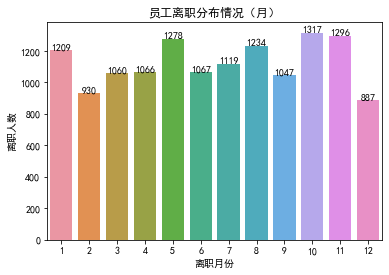

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # 使用该功能使jupyter显示出绘制的图表
plt.rc('font',family='SimHei')
barplot = sns.barplot(monthly_quited_num.index, monthly_quited_num.values)
for each in zip(monthly_quited_num.index, monthly_quited_num.values):
    barplot.text(each[0]-1, each[1],each[1],ha='center')
plt.xlabel('离职月份')
plt.ylabel('离职人数')
plt.title('员工离职分布情况（月）')
plt.show()